In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
#Defining functions
#Hermite polynomials by recursion
def H(n,x):
    if n==-1: return 0
    elif n==0: return 1
    elif n==1: return 2*x
    #elif n==1: return 2*x
    else: return 2*x*H(n-1,x)-2*(n-1)*H(n-2,x)

#Analytical solution for quadratic potential
def psi(n,x):
    return H(n,x)/np.sqrt((2**n*math.factorial(n)*np.sqrt(np.pi)))*np.exp(-x**2/2)

#Unitless quadratic potential
def k(n,x):
    return (2*epsilon(n)-x**2)

#Energy-eigenvalues for quadratic potential
def epsilon(n):
    return (n+1/2)

Text(0.5, 1.0, 'Analytical solution')

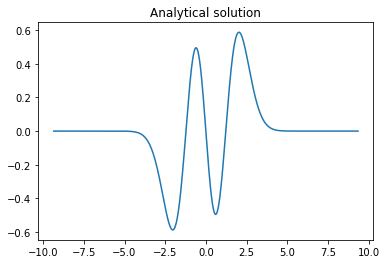

In [13]:
#Plot analytic solution 
n = 3 #Quantum-number n
start = np.sqrt(n+0.5)*5 #Deep into the non-classical zone
x = np.linspace(-start,start,1000)
plt.plot(x,psi(n,x))
plt.title("Analytical solution")

In [18]:
#Defining function for the numerov algorithm
def numerov(n,h):
    #Defining initial values 
    a = 1
    end = np.round(np.sqrt(n+0.5)*5/(0.1*n+1))
    start = -end
    steps = int(np.abs(start-end)/h)
    #Defining empty arrays
    y = np.zeros(steps)
    x = np.zeros(steps)
    
    #Fill x-array with x-koordinates in steps of h from end to start
    for i in range(steps):
        if i==0: x[0] = start
        else: x[i] = x[0]+i*h
    
    #Initializing y-array
    #For even solutions
    if (n % 2 == 0):
        y[0] = a
        y[1] = y[0] - h**2*k(n,x[0])*y[0]/2
        print("even")
    #For odd solutions
    else: 
        y[0] = 0
        y[1] = -h
        print("odd")
    
    #Steps
    for i in range(1,steps-1): 
        y[i+1]=(2*(1-5/12*h**2*k(n,x[i]))*y[i]-(1+1/12*h**2*k(n,x[i-1]))*y[i-1])/(1+1/12*h**2*k(n,x[i+1]))

    return x,y

odd


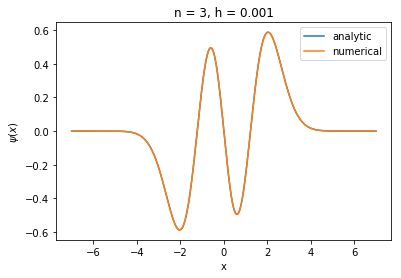

In [20]:
h = 0.001 #Stepsize
n = 3 #Quantum-number of energy-eigenstates

#Compute the solution and return arrays
x,y = numerov(n,h)

#Normalisation of the numerical solution
y_norm = y/max(y)*max(psi(n,x)) 

#Plot the analytical and numerical solution in one graph
plt.plot(x,psi(n,x),label="analytic")
plt.plot(x,y_norm,label="numerical")
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.title("n = {}, h = {}".format(n,h))
plt.legend()

In [16]:
#Defining linear potential
def k2(e,x):
    return (e-x)

#Defining new function for numerov algorithm
def numerov2(e,h,start,end):
    #Defining initial values
    a = 1e-6
    steps=int(np.abs(start-end)/h+h)
    y = np.zeros(steps)
    x = np.zeros(steps)
    
    #Fill x-array with coordinates
    for i in range(steps):
        if i==0: x[0]=start
        else: x[i] = x[0]+i*h
    
    #Initialize y-array
    y[0] = a
    y[1] = y[0] - h**2*k2(e,x[0])*y[0]/2
    
    #Steps 
    for i in range(1,steps-1):
        y[i+1]=(2*(1-5/12*h**2*k2(e,x[i]))*y[i]-(1+1/12*h**2*k2(e,x[i-1]))*y[i-1])/(1+1/12*h**2*k2(e,x[i+1]))
        
    return x,y

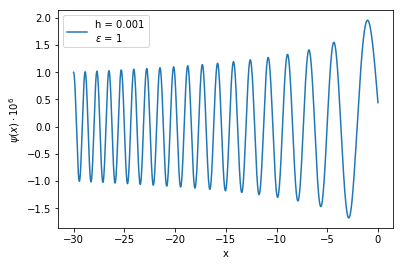

In [17]:
h = 0.001 #Stepsize
start = -30 #Start of the intervall
end = 0 #end of the intervall

#Energy-eigenvalues
#e = 1.0187
#e = 3.248
#e = 4.820
#e = 6.163

#Variable energy
e = 1

#Compute the function and return arrays
x,y = numerov2( e, h, start, end)

#Plot the solution
plt.plot( x, y*1e6, label="h = {}\n$\epsilon$ = {}".format(h,e))
plt.legend()
#plt.title()
plt.xlabel("x")
plt.ylabel("$\psi(x)\cdot10^{6}$")
plt.savefig("partb3.jpg")